# Q2, a. iii

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# load data
data = pd.read_excel('dataQ2.xlsx')

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Compute the logarithms of the variables
data['y'] = np.log(data['Y'])
data['k'] = np.log(data['K'])
data['h'] = np.log(data['H'])

# Estimate the linear regression model using OLS
X = sm.add_constant(data[['k', 'h']])
model = sm.OLS(data['y'], X).fit()

# Print the estimated parameters and their standard errors
print(model.summary())

# Compute the residual sum of squares
rssu = ((model.resid)**2).sum()
print('RSSU =', rssu)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     41.80
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           6.46e-17
Time:                        17:38:36   Log-Likelihood:                 67.229
No. Observations:                 335   AIC:                            -128.5
Df Residuals:                     332   BIC:                            -117.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4477      1.230      2.803      0.0

# Q2, b, ii

In [2]:
import statsmodels.api as sm

# create a new variable for (1-β_1)*h_t
data['h_restricted'] = (1 - data['k'])

# estimate the restricted model
restricted_model = sm.OLS(data['y'], sm.add_constant(data[['k', 'h_restricted']])).fit()

# compute RSSR
RSSR = restricted_model.ssr
print("RSSR:", RSSR)


RSSR: 13.139365467029997


# Q2, b, iii

In [3]:
# estimate the unrestricted model
unrestricted_model = sm.OLS(data['y'], sm.add_constant(data[['k', 'h']])).fit()

# compute RSSU
RSSU = unrestricted_model.ssr

# compute the F-statistic
m = 1
T = len(data)
k = 3
F_statistic = ((RSSR - RSSU)/m) / (RSSU/(T - k))
print("F-statistic:", F_statistic)


F-statistic: 0.24212722243118398


Using a significance level of 5%, the critical value for the F_(1,∞) distribution is 3.84. Since our calculated F-statistic is much smaller than the critical value, we failed to reject the null hypothesis at the 5% significance level. Using a significance level of 1%, the critical value for the F_(1,∞) distribution is 6.63. Since our calculated F-statistic is still much smaller than the critical value, we also failed to reject the null hypothesis at the 1% significance level. Therefore, we conclude that there is no strong evidence to suggest that β_1 + β_2 ≠ 1.

# Q3

### a

In [4]:
import pandas as pd

gdp = pd.read_excel('fredgraph.xls')
gdppot = pd.read_excel('GDPPOT.xls')
cpi = pd.read_excel('CORESTICKM159SFRBATL.xls')

# Merge the data into a single DataFrame
data = pd.merge(gdp, gdppot, on='DATE', suffixes=('_gdp', '_gdppot'))
data = pd.merge(data, cpi, on='DATE')
data.columns = ['date', 'gdp', 'gdppot', 'cpi']
data = data.set_index('date')

# Compute the output gap
data['output_gap'] = 100 * (data['gdp'].apply(np.log) - data['gdppot'].apply(np.log))

# Compute the inflation rate
data['inflation'] = 100 * data['cpi'].pct_change()

# Compute the first lag of the inflation rate
data['inflation_lag1'] = data['inflation'].shift(1)

# Save the data to an Excel file
data.to_excel('data.xlsx')


### b

In [5]:
import pandas as pd
import statsmodels.api as sm

# Load data from Excel file
data = pd.read_excel('Q3.xlsx', sheet_name='Sheet1', index_col=0)

# Compute the output gap
data['y_t'] = 100 * (pd.np.log(data['gdp']) - pd.np.log(data['gdppot']))

# Compute the inflation rate and its first lag
data['pi_t'] = data['cpi'].pct_change(periods=1) * 100
data['pi_lag1'] = data['pi_t'].shift(1)

# Drop missing values
data = data.dropna()

# Estimate linear regression model
X = sm.add_constant(data['y_t'])
model = sm.OLS(data['pi_t'], X).fit()

# Print regression results
print(model.summary())

# Compute residuals
data['residuals'] = model.resid


                            OLS Regression Results                            
Dep. Variable:                   pi_t   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     7.107
Date:                Sun, 12 Mar 2023   Prob (F-statistic):            0.00876
Time:                        17:38:37   Log-Likelihood:                -457.36
No. Observations:                 119   AIC:                             918.7
Df Residuals:                     117   BIC:                             924.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1110      1.278      2.435      0.0

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_39825/4225186873.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['y_t'] = 100 * (pd.np.log(data['gdp']) - pd.np.log(data['gdppot']))


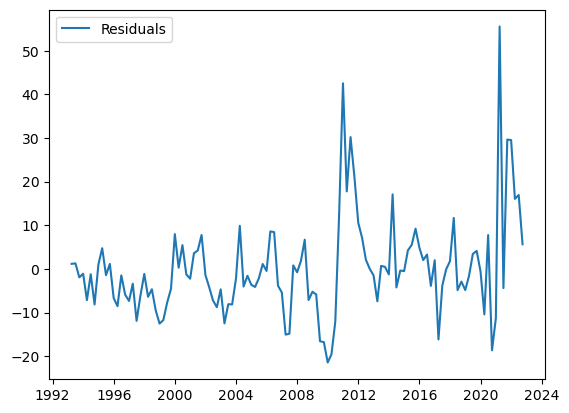

In [6]:
import matplotlib.pyplot as plt

# Plot residuals
fig, ax = plt.subplots()
ax.plot(data.index, data['residuals'], label='Residuals')
ax.legend()
plt.show()


### c

### i

In [7]:
import statsmodels.api as sm

# create lagged residuals
resid_lag1 = data['residuals'].shift(1)
resid_lag2 = data['residuals'].shift(2)

# remove missing values
df = pd.concat([data['residuals'], data['output_gap'], resid_lag1, resid_lag2], axis=1)
df.dropna(inplace=True)
df.columns = ['e', 'y', 'e_lag1', 'e_lag2']

# estimate auxiliary regression
X = df[['y', 'e_lag1', 'e_lag2']]
X = sm.add_constant(X)
y = df['e']
results = sm.OLS(y, X).fit()
r2 = results.rsquared
print('R-squared:', r2)


R-squared: 0.21808463842874126


### ii

In [8]:
# compute sample size
TA = len(df)

# compute test statistic
AR2 = TA * r2
print('AR(2) test statistic:', AR2)

# compare with critical value
critical_value = 3.0  # for alpha=0.05 and 2 lags
if AR2 > critical_value:
    print('Reject H0: Autocorrelation present')
else:
    print('Cannot reject H0: No autocorrelation')


AR(2) test statistic: 25.515902696162726
Reject H0: Autocorrelation present


# d

In [9]:
import pandas as pd
import statsmodels.api as sm

data = data.dropna()


# Read in data from Excel file
data = pd.read_excel('data.xlsx', sheet_name='Sheet1', index_col=0)

# Create lagged variables for inflation rate
data['inflation_lag1'] = data['inflation'].shift(1)

# Define dependent and independent variables
y = data['inflation']
X = data[['inflation_lag1', 'output_gap']]

# Add constant to independent variables
X = sm.add_constant(X)

data = data.dropna()        # remove rows with missing values
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())   # replace infinite values with mean of the column

In [10]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                nan
Time:                        17:38:38   Log-Likelihood:                    nan
No. Observations:                 121   AIC:                               nan
Df Residuals:                     118   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const                 nan        nan        

In [11]:
# Run the hypothesis test on β_2
#r = [0, 1, 0]  # Null hypothesis: β_2 = 0
#F_test = results.f_test(r)
#print('F-statistic:', F_test.fvalue)
#print('p-value:', F_test.pvalue)

ii

In [13]:
#covariance = np.cov(y[1:], pi[:-1])[0, 1]
#print('Sample covariance between y_t and π_(t-1):', covariance)